In [1]:
import os
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
from numpy import asarray
import pandas as pd
import collections
from sklearn.utils import shuffle
import shutil
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [2]:
normal_df = os.listdir('./dataset/Normal')
normal_df = shuffle(normal_df)
train_normal, test_normal = train_test_split(normal_df, test_size=0.3, random_state=101)
val_normal, test_normal = train_test_split(test_normal, test_size=0.5, random_state=101)
print(len(train_normal), len(val_normal), len(test_normal))

7134 1529 1529


In [3]:
covid_df = os.listdir('./dataset/COVID')
covid_df = shuffle(covid_df)
train_covid, test_covid = train_test_split(covid_df, test_size=0.3, random_state=101)
val_covid, test_covid = train_test_split(test_covid, test_size=0.5, random_state=101)
print(len(train_covid), len(val_covid), len(test_covid))

2531 542 543


In [4]:
TB_Chest_df = os.listdir('./dataset/TB_Chest')
TB_Chest_df = shuffle(TB_Chest_df)
train_TB_Chest, test_TB_Chest = train_test_split(TB_Chest_df, test_size=0.3, random_state=101)
val_TB_Chest, test_TB_Chest = train_test_split(test_TB_Chest, test_size=0.5, random_state=101)
print(len(train_TB_Chest), len(val_TB_Chest), len(test_TB_Chest))

466 100 100


In [5]:
Viral_Pneumonia_df = os.listdir('./dataset/Viral Pneumonia')
Viral_Pneumonia_df = shuffle(Viral_Pneumonia_df)
train_Viral_Pneumonia, test_Viral_Pneumonia = train_test_split(Viral_Pneumonia_df, test_size=0.3, random_state=101)
val_Viral_Pneumonia, test_Viral_Pneumonia = train_test_split(test_Viral_Pneumonia, test_size=0.5, random_state=101)
print(len(train_Viral_Pneumonia), len(val_Viral_Pneumonia), len(test_Viral_Pneumonia))

941 202 202


In [6]:
data_path = './'


In [7]:
train_path = os.path.join(data_path, 'train')
os.mkdir(train_path)
train_normal_path = os.path.join(train_path, 'normal')
os.mkdir(train_normal_path)
train_Viral_Pneumonia_path = os.path.join(train_path, 'Viral_Pneumonia')
os.mkdir(train_Viral_Pneumonia_path)
train_Covid_path = os.path.join(train_path, 'Covid')
os.mkdir(train_Covid_path)
train_TB_Chest_path = os.path.join(train_path, 'TB_Chest')
os.mkdir(train_TB_Chest_path)

In [8]:
# val_path = os.path.join(data_path, 'val')
# os.mkdir(val_path)
# val_normal_path = os.path.join(val_path, 'normal')
# os.mkdir(val_normal_path)
# val_abnormal_path = os.path.join(val_path, 'abnormal')
# os.mkdir(val_abnormal_path)
val_path = os.path.join(data_path, 'val')
os.mkdir(val_path)
val_normal_path = os.path.join(val_path, 'normal')
os.mkdir(val_normal_path)
val_Viral_Pneumonia_path = os.path.join(val_path, 'Viral_Pneumonia')
os.mkdir(val_Viral_Pneumonia_path)
val_Covid_path = os.path.join(val_path, 'Covid')
os.mkdir(val_Covid_path)
val_TB_Chest_path = os.path.join(val_path, 'TB_Chest')
os.mkdir(val_TB_Chest_path)

In [9]:
# test_path = os.path.join(data_path, 'test')
# os.mkdir(test_path)
# test_normal_path = os.path.join(test_path, 'normal')
# os.mkdir(test_normal_path)
# test_abnormal_path = os.path.join(test_path, 'abnormal')
# os.mkdir(test_abnormal_path)
test_path = os.path.join(data_path, 'test')
os.mkdir(test_path)
test_normal_path = os.path.join(test_path, 'normal')
os.mkdir(test_normal_path)
test_Viral_Pneumonia_path = os.path.join(test_path, 'Viral_Pneumonia')
os.mkdir(test_Viral_Pneumonia_path)
test_Covid_path = os.path.join(test_path, 'Covid')
os.mkdir(test_Covid_path)
test_TB_Chest_path = os.path.join(test_path, 'TB_Chest')
os.mkdir(test_TB_Chest_path)


In [10]:
def img_preprocessing(src):
    img = cv.imread(src, 0)
    org_img = img.copy()
    brightest = np.amax(img)
    darkest = np.amin(img)
    T = darkest + 0.9*(brightest - darkest)
    thre_img = cv.threshold(img, T, 255, cv.THRESH_BINARY)
    thre_img = thre_img[1]
    kernel = np.ones((5, 5),np.uint8)
    cleaned = cv.erode(thre_img,kernel,iterations = 5)
    cleaned = cv.dilate(cleaned,kernel,iterations = 5)
    cleaned = cleaned // 255
    img = img * cleaned
    img = org_img - img
    dim = (224, 224)
    img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    B = cv.bilateralFilter(img, 9, 75, 75)
    R = cv.equalizeHist(img)
    new_img = cv.merge((B, img, R))
    return new_img

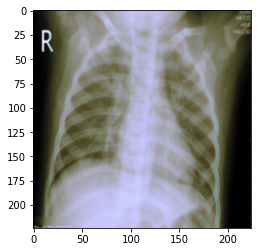

In [12]:
img = img_preprocessing('./dataset/Viral Pneumonia/Viral Pneumonia-1.png')
plt.imshow(img)

In [14]:
# normal train data
for img in train_normal:
    src = './dataset/Normal/' + img
    im = img_preprocessing(src)
    dst = train_path + '/' + 'normal/' + img
    cv.imwrite(dst, im)

In [15]:
#abnormal train data
for img in train_covid:
    src = './dataset/COVID/' + img
    im = img_preprocessing(src)
    dst = train_path + '/' + 'Covid/' + img
    cv.imwrite(dst, im)

    #abnormal train data
for img in train_TB_Chest:
    src = './dataset/TB_Chest/' + img
    im = img_preprocessing(src)
    dst = train_path + '/' + 'TB_Chest/' + img
    cv.imwrite(dst, im)
    
    #abnormal train data
for img in train_Viral_Pneumonia:
    src = './dataset/Viral Pneumonia/' + img
    im = img_preprocessing(src)
    dst = train_path + '/' + 'Viral_Pneumonia/' + img
    cv.imwrite(dst, im) 

In [16]:
# normal validation data
for img in val_normal:
    src = './dataset/Normal/' + img
    im = img_preprocessing(src)
    dst = val_path + '/' + 'normal/' + img
    cv.imwrite(dst, im)
#abnormal validation data
for img in val_covid:
    src = './dataset/COVID/' + img
    im = img_preprocessing(src)
    dst = val_path + '/' + 'Covid/' + img
    cv.imwrite(dst, im)
for img in val_TB_Chest:
     src = './dataset/TB_Chest/' + img
     im = img_preprocessing(src)
     dst = val_path + '/' + 'TB_Chest/' + img
     cv.imwrite(dst, im)
for img in val_Viral_Pneumonia:
     src = './dataset/Viral Pneumonia/'  + img
     im = img_preprocessing(src)
     dst = val_path + '/' + 'Viral_Pneumonia/' + img
     cv.imwrite(dst, im) 

 

In [17]:
# normal test data
for img in test_normal:
    src = './dataset/Normal/' + img
    im = img_preprocessing(src)
    dst = test_path + '/' + 'normal/' + img
    cv.imwrite(dst, im)
    #abnormal test data
for img in test_covid:
    src =  './dataset/COVID/' + img
    im = img_preprocessing(src)
    dst = test_path + '/' + 'Covid/' + img
    cv.imwrite(dst, im)
for img in test_TB_Chest:
     src = './dataset/TB_Chest/' + img
     im = img_preprocessing(src)
     dst = test_path + '/' + 'TB_Chest/' + img
     cv.imwrite(dst, im)
for img in test_Viral_Pneumonia:
    src = './dataset/Viral Pneumonia/'  + img
    im = img_preprocessing(src)
    dst = test_path + '/' + 'Viral_Pneumonia/' + img
    cv.imwrite(dst, im) 


In [18]:
train_path = './train/'
valid_path = './val/'
test_path =  './test/'

In [19]:
NUM_AUG_IMAGES_WANTED = 11000

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [20]:
class_list = ['normal','Viral_Pneumonia', 'Covid','TB_Chest']

for item in class_list:
    aug_dir = os.path.join(data_path, 'aug_dir')
    os.mkdir(aug_dir)
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)
    img_class = item
    img_list = os.listdir(train_path + img_class)
    for fname in img_list:
            src = os.path.join(train_path + img_class, fname)
            dst = os.path.join(img_dir, fname)
            shutil.copyfile(src, dst)
    path = aug_dir
    save_path = train_path + img_class
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,save_to_dir=save_path,save_format='png',target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),batch_size=batch_size)
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((NUM_AUG_IMAGES_WANTED-num_files)/batch_size))
    for i in range(0,num_batches):
        imgs, labels = next(aug_datagen)
    shutil.rmtree(aug_dir)

Found 7134 images belonging to 1 classes.
Found 941 images belonging to 1 classes.
Found 2531 images belonging to 1 classes.
Found 466 images belonging to 1 classes.


In [21]:
# datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255)
train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical')                                      
val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(224,224),
                                        batch_size=10,
                                        class_mode='categorical')
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(224,224),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 43261 images belonging to 4 classes.
Found 2373 images belonging to 4 classes.
Found 2374 images belonging to 4 classes.


In [22]:
width = 224
height = 224
classes = 4
shape = (width, height, 3)

In [23]:
# Model Architecture
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully conected
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                      

In [25]:
learning_rate = 0.00001
epochs = 50
# epoch
# Steps
# 
batch_size = 180

In [26]:
model.compile(optimizer= Adam(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

START TRAINING


C:\Users\user\AppData\Local\Temp\ipykernel_10636\3159280466.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_gen , validation_data = val_gen, epochs = epochs, steps_per_epoch=32959//batch_size, verbose=1)


Epoch 1/50
183/183 [==============================] - 7018s 38s/step - loss: 1.1746 - accuracy: 0.5464 - val_loss: 1.4093 - val_accuracy: 0.2284
Epoch 2/50
183/183 [==============================] - 3870s 21s/step - loss: 0.8738 - accuracy: 0.6754 - val_loss: 1.5827 - val_accuracy: 0.2174
Epoch 3/50
183/183 [==============================] - 3147s 17s/step - loss: 0.7923 - accuracy: 0.7093 - val_loss: 1.5703 - val_accuracy: 0.2642
Epoch 4/50
183/183 [==============================] - 3135s 17s/step - loss: 0.8361 - accuracy: 0.6978 - val_loss: 0.6303 - val_accuracy: 0.7577
Epoch 5/50
183/183 [==============================] - 3144s 17s/step - loss: 0.7960 - accuracy: 0.6978 - val_loss: 0.5462 - val_accuracy: 0.7817
Epoch 6/50
183/183 [==============================] - 3172s 17s/step - loss: 0.7751 - accuracy: 0.7148 - val_loss: 1.2654 - val_accuracy: 0.6974
Epoch 7/50
183/183 [==============================] - 3132s 17s/step - loss: 0.6695 - accuracy: 0.7563 - val_loss: 0.8212 - val_ac

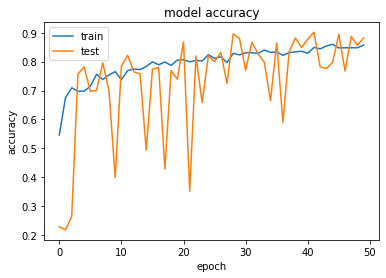

Plot Loss


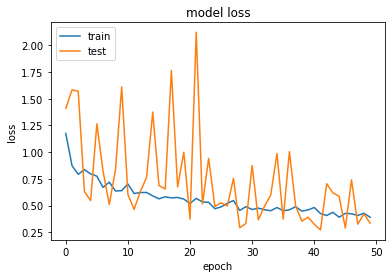

TEST: 


C:\Users\user\AppData\Local\Temp\ipykernel_10636\3159280466.py:26: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_gen,2274) #2274 testing images


Test Accuracy =  0.8861038088798523
Test Loss =  0.31091445684432983


In [27]:
# Fit model
print('START TRAINING')
H = model.fit_generator(train_gen , validation_data = val_gen, epochs = epochs, steps_per_epoch=32959//batch_size, verbose=1)
#save model
model.save('model.h5')
# summarize history for accuracy
print('Plot accuracy: ')
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
print('Plot Loss')
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# test
print('TEST: ')
scores = model.evaluate_generator(test_gen,2274) #2274 testing images
print("Test Accuracy = ", scores[1])
print("Test Loss = ", scores[0])

In [28]:
test_labels = test_gen.classes

In [29]:
test_labels

array([0, 0, 0, ..., 3, 3, 3])

In [30]:
predictions = model.predict_generator(test_gen, verbose = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_10636\884655040.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen, verbose = 1)


2374/2374 [==============================] - 909s 382ms/step


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
predictions.argmax(axis = 1)

array([3, 0, 0, ..., 0, 3, 0], dtype=int64)

In [1]:
cm = confusion_matrix(test_labels, predictions.argmax(axis = 1))

NameError: name 'confusion_matrix' is not defined

In [34]:
test_gen.class_indices

{'Covid': 0, 'TB_Chest': 1, 'Viral_Pneumonia': 2, 'normal': 3}

In [35]:
import seaborn as sns

<AxesSubplot:>

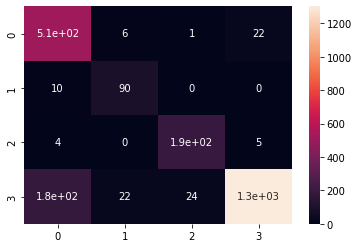

In [36]:
sns.heatmap(cm, annot = True)

In [37]:
model.save('model.h5')

In [38]:
from tensorflow import keras
model = keras.models.load_model('model.h5')